Eq(x(t), (C1 + C2*exp(-t))*exp(-t))

Eq(x(t), C1*exp(-2*t) + C2*exp(-t) + sin(t)/5 - 3*cos(t)/5)

Eq(x(t), sin(t)/5 - 3*cos(t)/5 + 2*exp(-t) - 7*exp(-2*t)/5)

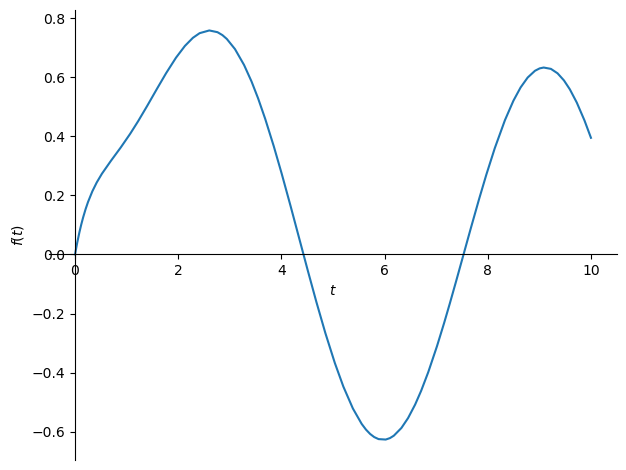

In [13]:
#Ermitteln Anfangswertproblem durch symbolische Berechnung (sympy)
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import IFrame

#Symbole (Variablen) und Funktionen definieren
t = sp.symbols('t') #Variablen festlegen
x = sp.Function('x')(t) #Funktionen festlegen
xp = sp.Derivative(x) #erste Ableitung festlegen
xpp = sp.Derivative(xp) #zweite Ableitung festlegen

#Parameter
t0 = 0
tn = 10
x0 = 0
xp0 = 1

#allgemeine homogene Differentialgleichung aufstellen
ode_ho = sp.Eq(xpp+3*xp+2*x,0) #linke Seite links von Komma, rechte Seite 0
sol_ho = sp.dsolve(ode_ho) #löst die Gleichung
display(sol_ho)

#allgemeine inhomogene Differentialgleichung aufstellen
ode_inh = sp.Eq(xpp+3*xp+2*x,2*sp.sin(t)) #linke Seite links von Komma, rechte Seite von Komma Störfunktion
sol_inh = sp.dsolve(ode_inh) #löst die Gleichung
display(sol_inh)

#lösung des Anfangswertproblems
initconds = {x.subs(t, 0): 0, xp.subs(t, 0): 1} #für Anfangswerte
sol_awp=sp.dsolve(ode_inh,ics=initconds) #löst die Gleichung
display(sol_awp)

#Schaubild anzeigen
sp.plot(sol_awp.rhs,(t,t0,tn))
plt.show()



In [ ]:
'''
#----------Swingboat-Aufgabe als Vergleich--------------

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import IFrame

#----------------DGL aufstellen--------------

#Parameter bestimmen
g = 9.81 # Erdbeschleunigung [m/s^2] 
m = 100.0 # Masse [kg]
l = 2.0 # Länge des Pendels [m]
k = 25.0 # Reibung [kg/s]
phi_0 = 0.1 # Anfangsauslenkung
dotphi_0 = 0.0 # Anfangsgeschwindigkeit
t0, t1 = 0.0, 30.0 # Zeitintervall

#Symbole (Variablen) und Funktionen definieren
t = sp.symbols('t') #Variablen festlegen
phi = sp.Function('phi')(t) #Funktionen festlegen
phip = sp.Derivative(phi) #erste Ableitung festlegen
phipp = sp.Derivative(phip) #zweite Ableitung festlegen

#Differentialgleichung aufstellen
ode = sp.Eq(m*l*phipp + k*l*phip + m*g*phi, 0) #linke Seite links von Komma, rechte Seite rechts
#sp.dsolve(ode) #löst die Gleichung



#-----------Anfangswertproblem lösen--------------

# Exakte Lösung der linearen Differentialgleichung
initconds = {phi.subs(t, 0): phi_0, phip.subs(t, 0): dotphi_0} #Anfangswertprobleme herausgeschrieben
sol = sp.dsolve(ode, ics=initconds) #Lösung mit Anfangswertproblem lösen

# NumPy-fähige Funktion erstellen
phi_expr = sp.lambdify(t, sol.rhs) #nur rechte seite, da auf linker seite nur funktionsname steht, deshalb .rhs

# Zeitpunkte für die Berechnung der Lösung
time_points = np.linspace(t0, t1, 1000) #mehrere Punkte setzen in dem vorgegebenen Intervall, sodass Graph sichtbar wird

# Lösung berechnen
phi_values = phi_expr(time_points) #hier werden die Lösungen berechnet, sodass diese in die Grafik eingesetzt werden können

# Schaubild erstellen
plt.figure(figsize=(8, 6))
plt.plot(time_points, phi_values)
plt.title('Exakte Lösung der linearisierten DGL für das mathematische Pendel')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung')
plt.grid(True)
'''